In [36]:
from gensim.models import Word2Vec

In [37]:
# 모델에 들어갈 training data 만들기
sentences = [['once', 'upon', 'a', 'time', 'there', 'was', 'an', 'old', 'sow', 'with', 'three', 'little', 'pig'],
             ['the', 'first', 'that', 'went', 'off', 'met', 'a', 'man', 'with', 'a', 'bundle', 'of', 'straw'],
             ['the', 'second', 'pig', 'met', 'a', 'man', 'with', 'a', 'bundle', 'of', 'furze'],
             ['the', 'third', 'little', 'pig', 'met', 'a', 'men', 'with', 'a', 'load', 'of', 'bricks']]

# 모델 학습시키기
model = Word2Vec(sentences, min_count=1) 
# size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

In [38]:
# 학습된 모델 확인하기
print(model)

Word2Vec(vocab=29, size=100, alpha=0.025)


In [39]:
# 모델에 구축된 vocabulary 확인하기
words = list(model.wv.vocab)
print(words)

['once', 'upon', 'a', 'time', 'there', 'was', 'an', 'old', 'sow', 'with', 'three', 'little', 'pig', 'the', 'first', 'that', 'went', 'off', 'met', 'man', 'bundle', 'of', 'straw', 'second', 'furze', 'third', 'men', 'load', 'bricks']


In [40]:
# 별도의 파일로 모델 저장하기
model.save('model.bin')

In [41]:
# 저장해 둔 모델 불러오기
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=29, size=100, alpha=0.025)


In [42]:
# PCA를 이용하여 단어 벡터를 시각화
# PCA는 고차원의 단어 벡터를 2차원으로 줄여 시각화할 수 있는 형태로 만들어 줌 
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [43]:
# 방금 학습된 word2vec 모델
# vocabulary에 들어 있는 단어 각각에 대해 100차원의 벡터가 생성되어 있음
X = model[model.wv.vocab]
print(X)

[[-9.9358091e-04  2.1466396e-03 -4.3417756e-03 ... -1.9097324e-03
   5.5775291e-04 -4.0080911e-03]
 [-4.7094254e-03  8.1437192e-04 -4.1195373e-03 ... -2.7740345e-04
  -3.4418844e-03  1.6103040e-03]
 [ 1.7708667e-03  4.4609667e-03  4.6544024e-03 ... -4.7484883e-03
  -1.6334134e-03  2.6496532e-03]
 ...
 [ 4.0677325e-03  2.7244395e-04 -2.7431420e-03 ...  1.3374110e-03
   2.6197911e-03 -3.4560214e-03]
 [ 5.0507992e-04  2.7087049e-04  2.8332663e-03 ... -8.2358887e-04
  -1.2653337e-03 -4.8126262e-03]
 [-3.1906308e-04  1.3377409e-03  3.1288178e-03 ... -3.5234734e-05
   3.2247442e-03 -2.8125504e-03]]


C:\Users\MinhoLee\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# 이 벡터(여기서는 30x100)에 2차원 PCA 모델을 적용시켜 2차원으로 바꾸어 줌
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(result)

[[ 3.3242952e-03  4.9579288e-03]
 [ 5.1910500e-03  2.5974463e-03]
 [-1.0791953e-03 -3.0181834e-03]
 [ 3.2325543e-03 -1.3804319e-02]
 [-4.0992191e-03  5.8465945e-03]
 [-1.5545818e-02 -8.6128013e-03]
 [ 6.2408438e-03  1.2764152e-03]
 [-8.4845219e-03 -4.7509049e-04]
 [-6.4037490e-04  9.5114680e-03]
 [-8.9065852e-03 -6.9654309e-03]
 [ 1.7529506e-02 -1.2222252e-02]
 [-6.9481751e-04 -2.2067750e-04]
 [ 3.7815562e-03 -1.2400352e-02]
 [-1.3537132e-03 -4.6906653e-03]
 [-3.1388190e-03 -1.8064466e-03]
 [ 1.1676394e-02  9.2343232e-03]
 [ 1.1007874e-03 -6.4903661e-03]
 [-1.4025853e-02 -6.8440698e-03]
 [-8.2299253e-03 -8.0093434e-03]
 [ 1.0802782e-02 -5.1449944e-04]
 [-2.6309360e-03  1.4151486e-02]
 [ 2.5862635e-03  1.4303361e-02]
 [-1.0422713e-02  1.4579286e-02]
 [-1.0834403e-03 -4.0593576e-03]
 [-9.0425909e-03  8.2433615e-03]
 [ 9.6823350e-03  3.3887222e-03]
 [-1.5254532e-03  3.4797791e-05]
 [ 1.1620268e-02  9.0090389e-04]
 [ 4.1353316e-03  1.1077564e-03]]


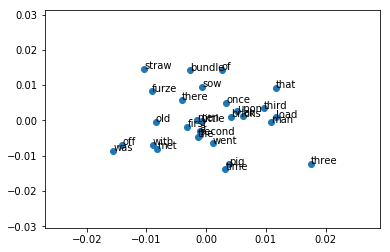

In [49]:
# 2차원 프로젝션 결과를 산점도에 그릴 수 있음
# 각 단어는 모델에서 학습한 의미에 따라 적절한 위치에 그려지게 됨
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()